# Implement KNN for Iris Classification

We are going to use Scikit-learn (`sklearn`) to build a KNN Classification model to classify iris flowers using the popular "Iris" data set. You can learn more about the data set in its Wikipedia entry:
[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Note: a classification model is also referred to as a classifier. You will often see the term "classifier" used throughout this program.

### Import Packages

Before we get started, let us import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from helper2 import visualize_knn
import os

We will also import the Scikit-learn `KNeighborsClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the metric `accuracy_score` to evaluate our model.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Step 1: Load the Iris Data Set

Next we will load the data from the iris data set and store it in a DataFrame named `df_iris`. Rather than examining the full dataset, we will just examine ten randomly selected items.

Notice that the dataset contains four features and one label: it contains four features of an iris flower and the species (label) to which it belongs. There are three different species that can be predicted: iris_setosa, iris-versicolor and iris-virginica. 

Therefore this is a multi-class problem; a flower can be classified as belonging to one of three classes.

In [3]:
filename = os.path.join(os.getcwd(), "data", "Iris_Data.csv")
df_iris = pd.read_csv(filename, header=0)

# shape
print(df_iris.shape)

# print a few random examples (rows)
df_iris.sample(n=10, replace=False, random_state=1)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


### Visualize the KNN Algorithm

The KNN algorithm predicts the class label of an unlabeled example by finding the $k$ closest labeled examples. The most common class label among these $k$ examples is chosen to be the predicted class label of the unlabeled example. (Note that examples are also referred to as data points).

Let's visualize this. To make the visualization simpler, rather than attempting to plot examples using all features, we are plotting examples with two dimensions (or two features).

The following code cell plots 50 examples from the iris dataset using two features: petal length, and petal width. You should be able to click anywhere on the plot to add a test point. The plot will then draw direct connections from your test point to the k-nearest neighbors. 

You can change the number of neighbors and examine the results.

<IPython.core.display.Javascript object>


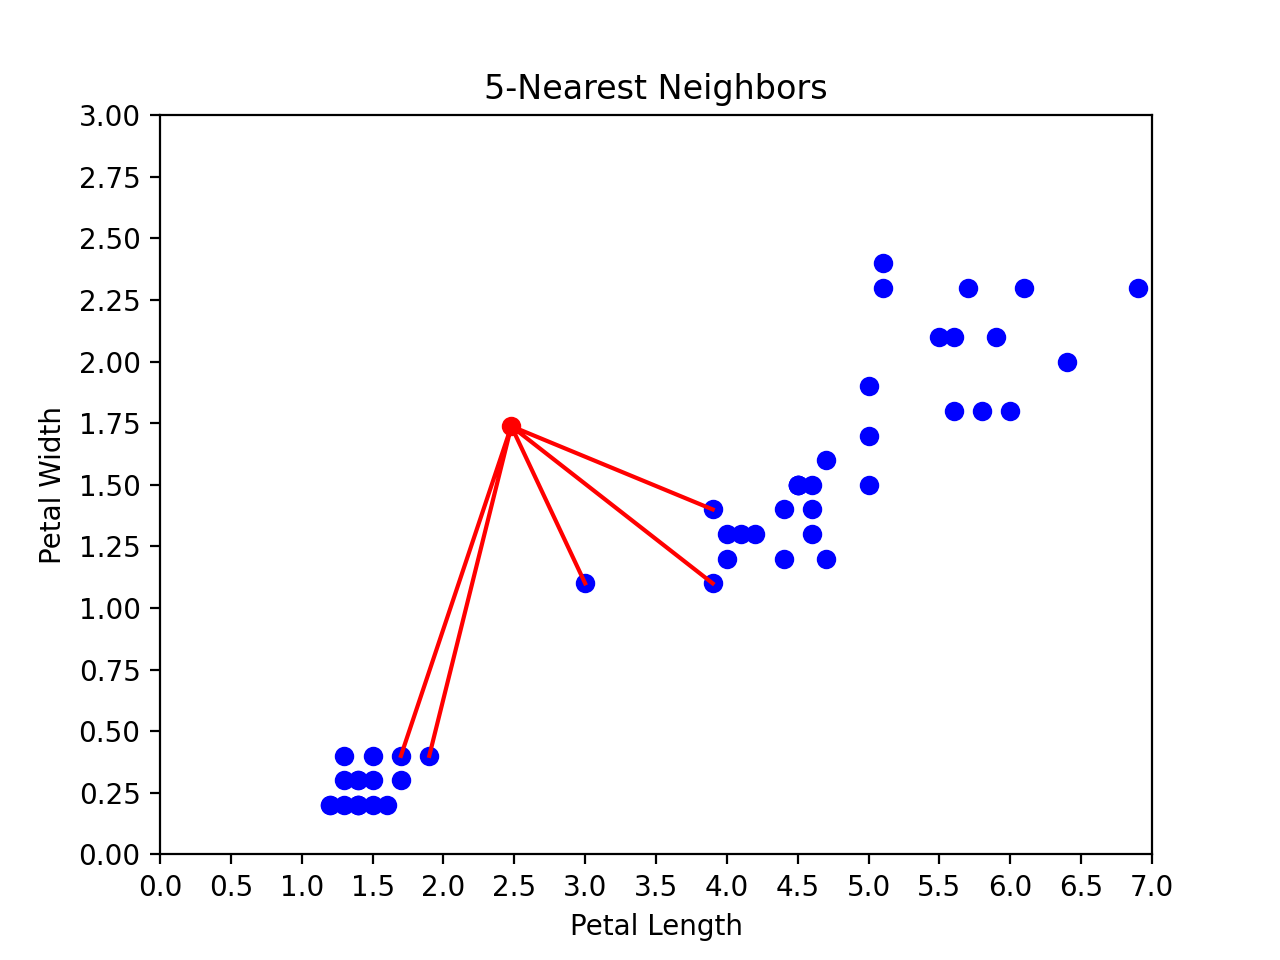

5


In [6]:
number_of_neighbors = 5
visualize_knn(number_of_neighbors)

### Step 2: Create Labeled Examples from the Data Set for the Training Phase


Let's create labeled examples from our dataset. The code cell below carries out the following steps:

* Takes the `petal_length` and `petal_width` columns from DataFrame `df_iris` and assigns them to the variable `X`. These are our features. 
* Takes the `species` column from `dfiris` and assigns it to the variable `y`. This is our label.
* Prints the values of `X` and `y`

Run the code cell below and inspect the results. You will see that we have 150 labeled examples. Each example contains two features (`petal_length` and `petal_width`) and one label (`species`).


In [7]:
X = df_iris[['petal_length', 'petal_width']]
y = df_iris['species'] 

print("Number of Examples: " + str(X.shape[0]))
print("Number of Features: " + str(X.shape[1]))
print("\nFeatures:\n")
print(X)
print("\nLabels:\n")
print(y)

Number of Examples: 150
Number of Features: 2

Features:

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]

Labels:

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


### Step 3: Create Training and Test Data Sets


Now that we have specified examples, we will need to split them into a training set that we will use to train our model, and a test set, which we will use to understand the performance of our model on new data. 

Scikit-learn has a convenient function ```train_test_split()``` to do all this for us in a systematic way. 
We have imported this method above. As its name suggests, this function splits a dataset into separate training and test sets. Consult the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn-model-selection-train-test-split) for more information.

#### Train and Test Data Set Sizes:

The `train_test_split()` function splits a dataset randomly, such that approximately 25% of the data winds up in the test set and the remaining 75% in the training set. You can also specify how much of the data set should be used as a test set using the parameter `test_size.`

Because ```train_test_split()``` generates random splits of the input data, each time we call the function we will get a different split.  Sometimes it is useful, for the purposes of code development, to be able to get reproducible random numbers or random splits, which can then be relaxed once one wishes to generate statistics over many random runs.     With ```train_test_split()```, this can be accomplished by using the ```random_state``` option; if specified with that state as an integer, then the <b>same</b> random split will be generated each time the function is called (until one changes the value of the integer).  This is known as providing a seed to the pseudo-random number generator that is used by ```train_test_split()```.

In our case, we want to split ```X``` and ```y``` into coordinated training and test sets, so we will use a seed.

#### Output:

The  ```train_test_split()``` function will return four outputs (four subsets of the data) in the following order `X_train`, `X_test`, `y_train`, `y_test`. In the code cell below, we have assigned these values to the proper variable names, indicating what each data subset will be used for in the training and evaluation process. Note that these variable names are the conventional standard, and are what you will use throughout this program.

Note that `X_train` corresponds to features that we will use to train our model,  and `y_train` corresponds to labels that we will use to train our model. 

Likewise, `X_test` corresponds to the features we will use to test our model, and `y_test` corresponds to the labels that we will use to determine whether the predictions our model makes on `X_test` are accurate.

In summary:

1. We will train the KNN model on `X_train` and `y_train`.

2. We will then apply the trained model to `X_test` to produce predicted class labels.

3. For evaluation, we will compare these predicted class labels against the true labels provided in `y_test`.


#### Task:

Examine the code in the cell below to see how to properly implement `train_test_split()`. Run the code cell below to execute ```train_test_split()``` with `X` and `y` as inputs, along with the parameters:
* `random_state=4` to ensure reproducible output each time the function is called
* `test_size=0.2`, which will randomly set aside 20% of the data to be used for testing. 


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


### Step 4: Fit a KNN Model to the Training Set

Scikit-learn works by creating objects that represent a model: in this case, the model is a KNN classification model (also known as a classifier). The basic workflow is to first create a ```KNeighborsClassifier``` model object, specifying all necessary model configurations, such as hyperparameter values. Next is to fit the model (train the model) to the training data; all model objects that one creates using `sklearn` possess a ```fit()``` method to accomplish this.  You can then use the model object to make predictions on the test data using the `predict()` method. 

The code cell below:

1. Creates a ```KNeighborsClassifier``` object, specifying the number of neighbors $k$ to be three, and assigns the result to the variable `model`. 

2. Calls the ```fit()``` method on ```model``` to fit the model to the training data. The first argument should be ```X_train``` and the second ```y_train```. 

3. Uses the trained model to make predictions on unlabeled examples contained in `X_test`. The cell below uses the ```predict()``` method on ```model``` with the argument ```X_test``` to use the trained model to predict values for the test data. It stores the outcome in the variable ```prediction```. We will compare these values to ```y_test``` later.

Execute the code cell below and notice how the different flowers in our test set were classified.

In [10]:
# Initialize the model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train) 

# Make predictions on the test set
prediction= model.predict(X_test) 

print(prediction)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']


### Step 5: Check the Accuracy of the Model

One way of assessing the performance of a classifier is by computing its accuracy on the test data, that is, what fraction of the test data are correctly predicted by the classifier.  Fortunately, Scikit-learn provides a built-in function named ```accuracy_score()``` that carries out this computation; we imported it above, and you can read more about it in the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score). The accuracy score is a fraction between 0 and 1 indicating the fraction of predictions that match the true value in the test set. 

NOTE: It was mentioned earlier that at times, specific loss functions may be used during the evaluation phase. In this case, accuracy produces the same result as the zero-one loss function. It is a very simple loss function that counts how many mistakes a model makes on the training data.


The code cell below takes our predictions and compares them against the actual values in `y_test`. Execute the code cell below to see the accuracy score of your model.

In [12]:
# Compute and print model's accuracy score
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))

Accuracy score of model: 0.9333333333333333


Your model has a pretty high score!

### Step 6: Train on All Features

We just trained on two features in the iris data set. Now let's train on all features and examine the accuracy score for the new model.

Let's create new labeled examples. The code cell below carries out the following steps:

* Uses all features from DataFrame `df_iris` and assigns them to the variable `X`. 
* Extracts the `species` data from `df_iris` and assigns it to the variable `y`. 
* Prints the values of `X` and `y`

Execute the code cell below and inspect the results. You will see that we have 150 labeled examples. Each example contains four features: `sepal_length`, `sepal_width`, `petal_length` and `petal_width`, and one label `species`.



In [13]:
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

The code cell below creates new train and test sets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

The code cell below trains the model on the training data, uses the model to make predictions on the test data and evaluates the model by obtaining the model's accuracy.

In [15]:
# Initialize the model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train) 

# Make predictions on the test set
prediction= model.predict(X_test) 

# Compute and print model's accuracy score
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))
    

Accuracy score of model: 0.9666666666666667


For more information on the `KNeighborsClassifier`, visit the online [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).